In [30]:
import os,sys
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))
import shallowsim as sb
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

import time
from tqdm import tqdm, trange


In [2]:
args = sb.ModelArgs()
c = sb.Config()
gpu_all_decode = sb.get_gpu_info('./device/gpu_info.csv',
                                 device_list=['GB300-NVL72','H800','H20'],
                                 decoding_mode=True) 

In [3]:

# generate data
dfs = []
for active_expert in trange(8,128,2):
    args.n_activated_experts = active_expert
    df = sb.decode_time_with_ep_list(args,gpu_all_decode,c,fp8_combine=True)
    df['index_value'] = active_expert
    df_o = df.groupby(['GPU','BatchSize','EP'],as_index=False).apply(lambda t: t[t.Total==t.Total.max()]).sort_values(['Total'],ascending=False).reset_index(drop=True)
    df_o.drop_duplicates(subset=['GPU','BatchSize','EP'], keep='first', inplace=True)
    dfs.append(df_o)
df = pd.concat(dfs)    
df.reset_index(inplace=True,drop=True)
df.to_csv('perf_vs_n_active_experts.csv')


100%|██████████████████████████████████████████████████████████████████████████████████████████| 60/60 [00:11<00:00,  5.25it/s]


In [4]:
#df = pd.read_csv('perf_vs_seq_len.csv')
#df['BatchSize']= df['BatchSize'].astype(int).astype(str)

In [6]:
#df1 = df[df['EP'] == 144].reset_index(drop=True)
df1 = df[df['BatchSize'] == 128].reset_index(drop=True)

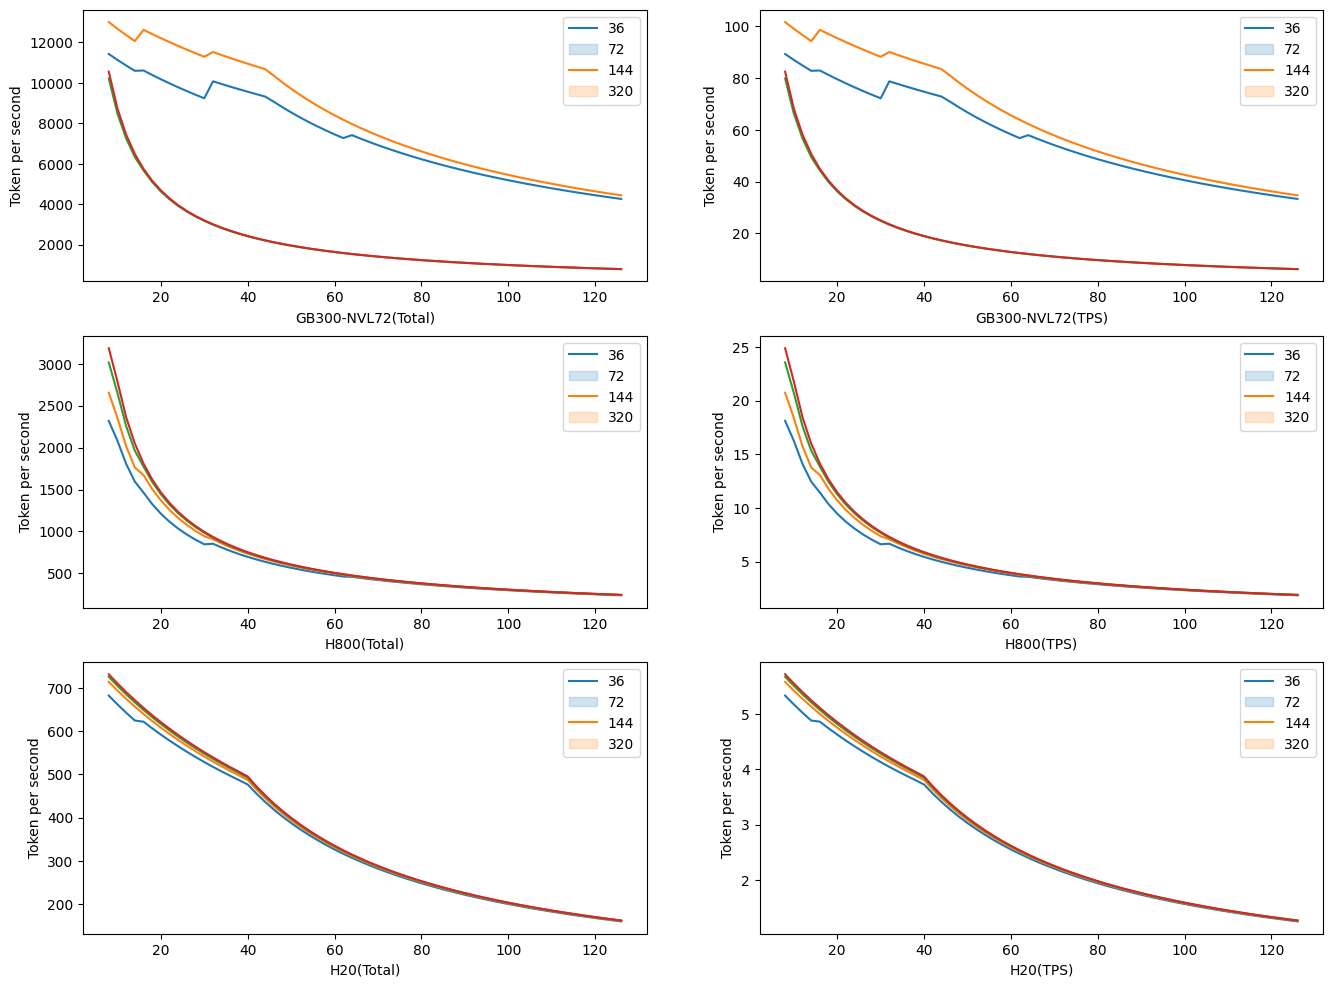

In [7]:
sb.draw(df1, gpu_all_decode, 'EP',[36,72,144,320], ['Total','TPS'],'Token per second')

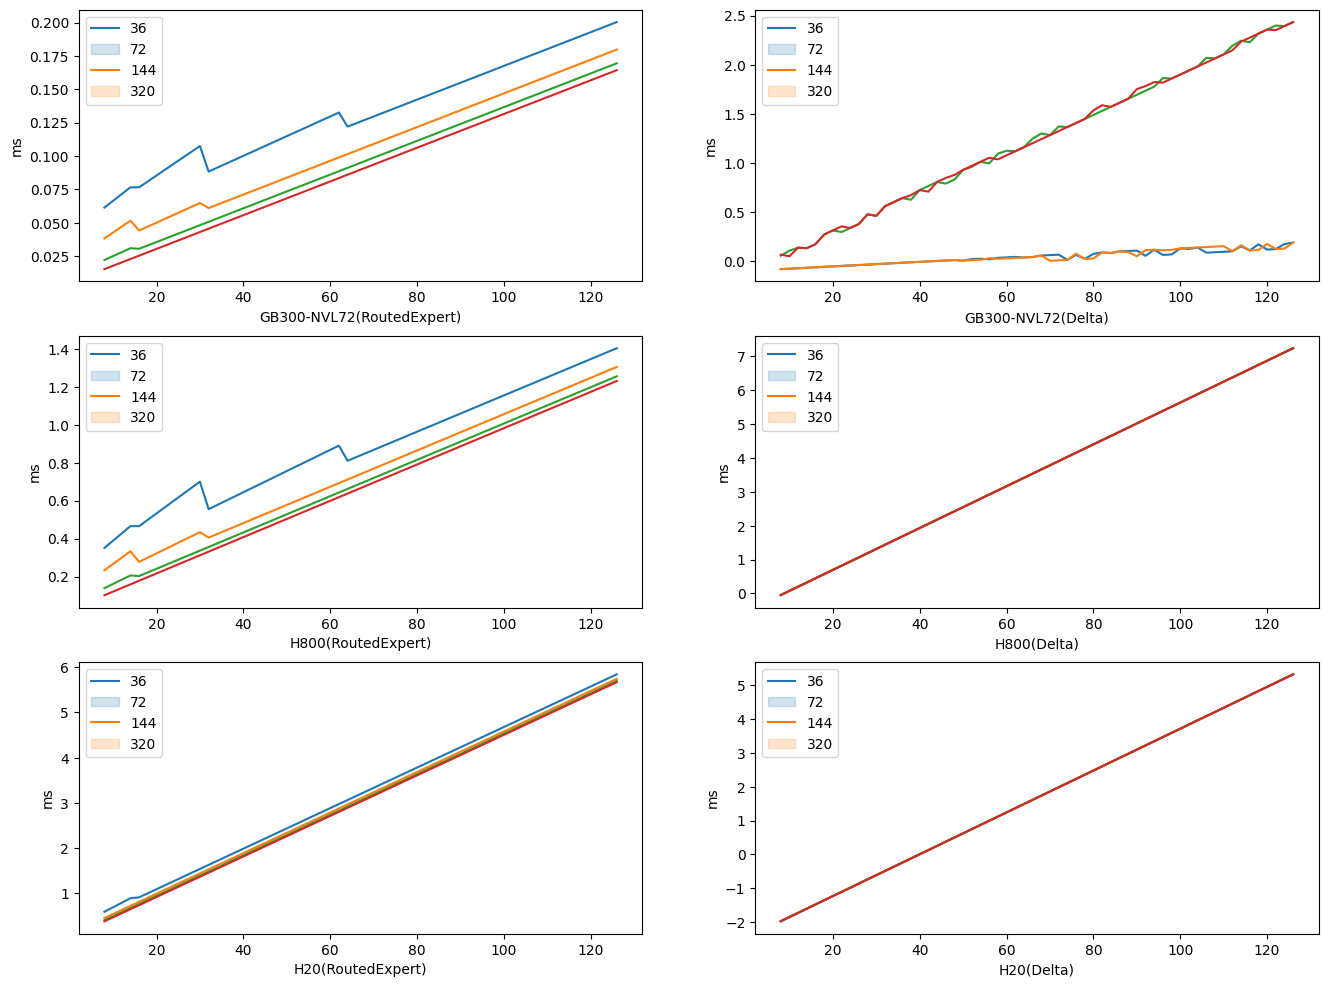

In [11]:
sb.draw(df1, gpu_all_decode, 'EP',[36,72,144,320],  ['RoutedExpert','Delta'],'ms')

In [31]:
args = sb.ModelArgs()
c = sb.Config()

# generate data
dfs = []
for nlayers in trange(30,256,2):
    args.n_layers = nlayers
    df = sb.decode_time_with_ep_list(args,gpu_all_decode,c,fp8_combine=True)
    df['index_value'] = nlayers
    df_o = df.groupby(['GPU','BatchSize','EP'],as_index=False).apply(lambda t: t[t.Total==t.Total.max()]).sort_values(['Total'],ascending=False).reset_index(drop=True)
    df_o.drop_duplicates(subset=['GPU','BatchSize','EP'], keep='first', inplace=True)
    dfs.append(df_o)
df = pd.concat(dfs)    
df.reset_index(inplace=True,drop=True)
df.to_csv('perf_vs_n_layers.csv')

    

100%|████████████████████████████████████████████████████████████████████████████████████████| 113/113 [00:14<00:00,  8.07it/s]


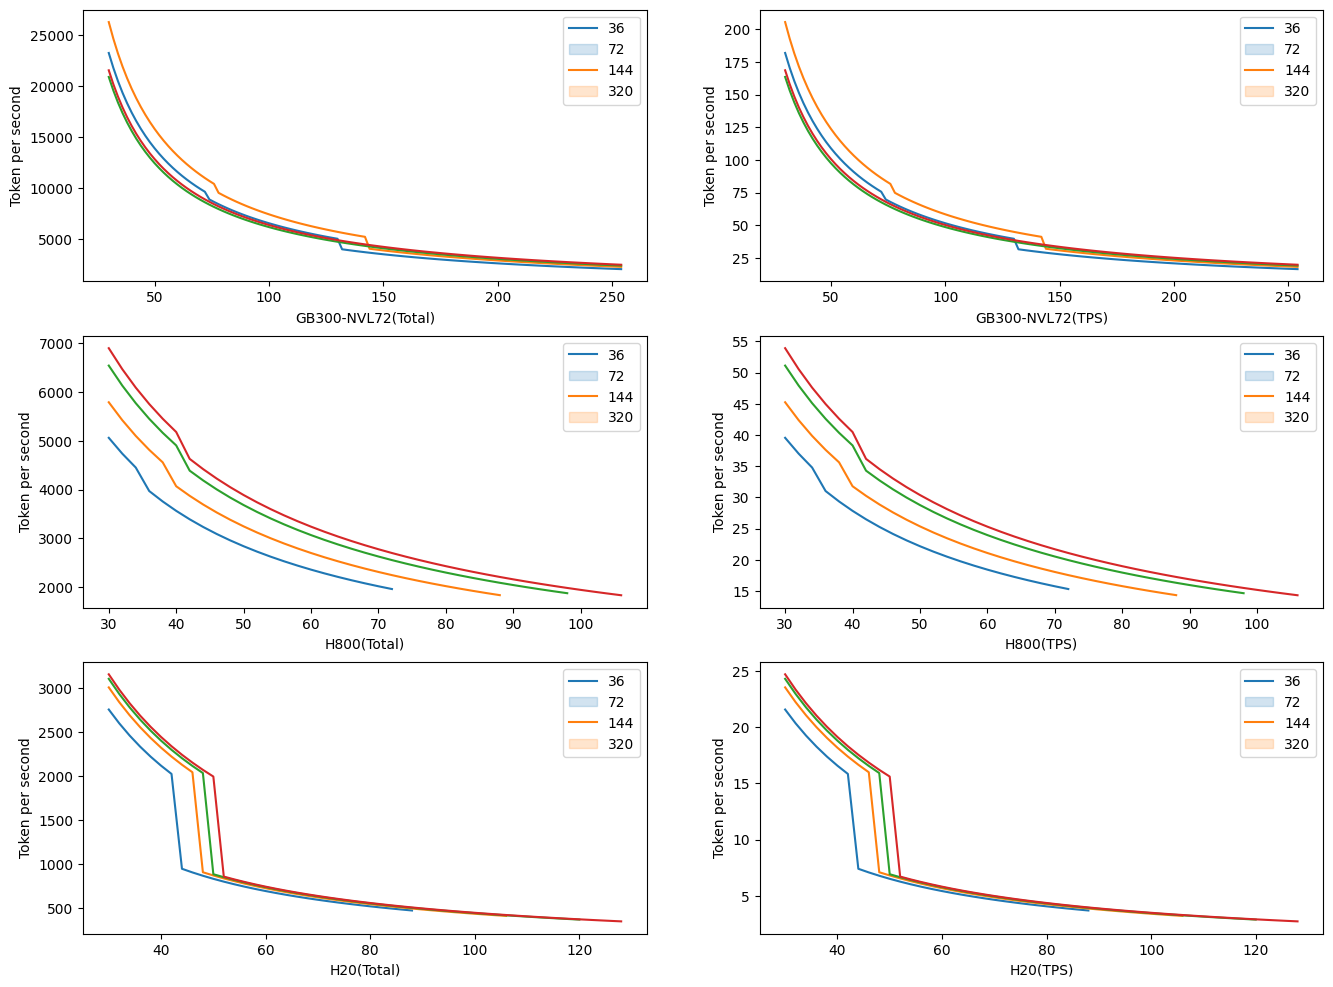

In [32]:
df1 = df[df['BatchSize'] == 128].reset_index(drop=True)
sb.draw(df1, gpu_all_decode, 'EP',[36,72,144,320], ['Total','TPS'],'Token per second')